## Problem 1: Given a sample with feature vector $x=[1.1, 2.2, 3.3]^T$, what is its augmented feature vector?

In [ ]:
# Feature vector
x = [1.1, 2.2, 3.3] # Given feature vector with 3 feature values
x_aug = [1.1, 2.2, 3.3, 1] # Augmented feature vector x

## Problem 2: If the weight vector of a linear classifier is $w=[1, 0, 1, 0]^T$, and we define that a sample belongs to class $+1$ if $w^Tx>0$ and $-1$ if $w^Tx<0$ where $x$ is the augmented feature vector of the sample, what is the class of the sample?

In [4]:
import numpy as np 

c1 = 1 # if W^T*X > 0
c2 = -1 # if W^T*X < 0

w = [1, 0, 1, 0]
x = [1.1, 2.2, 3.3, 1]
dot_prod = np.dot(x, w)
print(dot_prod)

# Answer = class 1 = 1

4.4


## Problem 3: In our discussion at the class, we used augmented but not normalized augmented (normalized and augmented) feature vectors to derive the solution for a linear classifier that minimizes the sum of squared error. What is the equation for computing the same loss function if using normalized augmented feature vectors? Let $x''_i$ be the normalized augmented feature vector of the $i$-th sample, and $w$ be the weight vector of the classifier. A correct prediction shall satisfy $w^Tx''_i>0$ regardless of the class of the sample because $x''_i$ has been normalized. You may use a computational algebra system to help -- but it is not required. It might be easier by hand on scratch paper.

Start with the regular loss function $\mathbf{J(W)}$, then multiply $y_i^2$ which will always have a value of $1$ regardless of the class label

$$J(\mathbf{W}) = \sum_{i=1}^N (\mathbf{W}^T\mathbf{x}_i'' -1)^2 $$

## 4. Please derive the solution for the new loss function. Keep variables and font style consistent with those in the class notes/slides. Denote $\mathbb{X}$ as a matrix, each row of which corresponds to a sample and each column of which corresponds to a feature value except the rightmost one (i.e., the bias term).

$$\mathbf{W} = (X''X''^T)^{-1}X''$$

## 5. The loss we discussed in this class is called L2 loss because of the squared error. We could also use the absolute error, by replacing the square operation with the absolute value operation. This is also known as L1 loss. Now define such a loss function without using the absolute value operation (suppose your are on a computer that doesn't have the abolute value operator, branch operators, or even square root operator, i.e., you cannot get absolute value using if-statements). The fact that class labels are either $+1$ and $-1$ gives you an edge. ("Anti"-Hint: if you are looking for hinge loss or cross-entropy loss, you are wrong. If you don't know what they are, it's no problem for now.)

The new loss function should be $\mathbf{XWY}$ where $X$ is the matrix with the rows being the augmented sample feature vectors, $Y$ is the vector of labels of the samples, and $W$ is the weight vector 

## 6. [3pts] The demo 2_Linear_classifiers.ipynb provides snippets of code to achieve a linear classifier using the minimization of the sum of the squared errors, and the visualization of the classifier. Now please define a function plot_mse that visualizes the training samples and the classifier on the sample plot.

## Inputs:

## X: a 2-D numpy array such that X[i], which is 1-D numpy array, corresponds to the i-th sample's feature vector (not augmented). The shape of X[i] is 1-by-2.

## y: a 1-D numpy array such that y[i], which is a scalar $\in[+1, -1]$, is the label of the i-th sample.

## filename: a string, the path to save the plot.

## Outputs

## w: the weight vector of the classifier, where the 1st element corresponds to the 1st dimension of a feature vector, the 2nd element corresponds to the 2nd dimension of a feature vector, and the last term is the bias.

In [8]:
import numpy as np
import numpy.random as rand 
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

N = 100 # Number of points

X1 = np.vstack((rand.normal(1, .1, N), rand.normal(2, 1, N))) # feature vector 1
X2 = np.vstack((rand.normal(1.1, 0.1, N), rand.normal(3, 1, N))) # feature vector 2

X0 = np.hstack((X1, X2))

X1.shape, X2.shape

((2, 100), (2, 100))

In [9]:
len(X1)

2

In [10]:
len(X1[0,:])

100

In [11]:
def plot_mse(X, y, filename): 
    

    w = np.array([0,0,0]) # placeholder

    compound = np.matmul(X, np.transpose(X))

    all_but_y = np.matmul(la.inv(compound), X)
    W = np.matmul(all_but_y, y)

    a, b, c, = W[0], W[1], W[2]
    h = [0, -1*c/a]
    vd = [-1*c/b, 0]

    colors = {
        1: 'red', 
        2: 'blue'
    }

    def plot_x_y():
        ax = plt.gca() # get current axes

        for i in range(len(X)):
            ax.scatter(X1[0], X1[1], color=colors[1])
            ax.scatter(X2[0], X2[1], color=colors[2])

        title = "X vs Y: Linear Regression"
        ax.set_title(title) # set the title of the graph
        ax.set_xlabel('X1') # set the x label of the plot
        ax.set_ylabel('X2') # set the y label of the plot
        ax.grid()

    figure = plt.figure(figsize=(10,10))
    plot_x_y()
    plt.plot(h, vd)
    plt.show()
    figure.savefig(filename)

    w = W

    return w

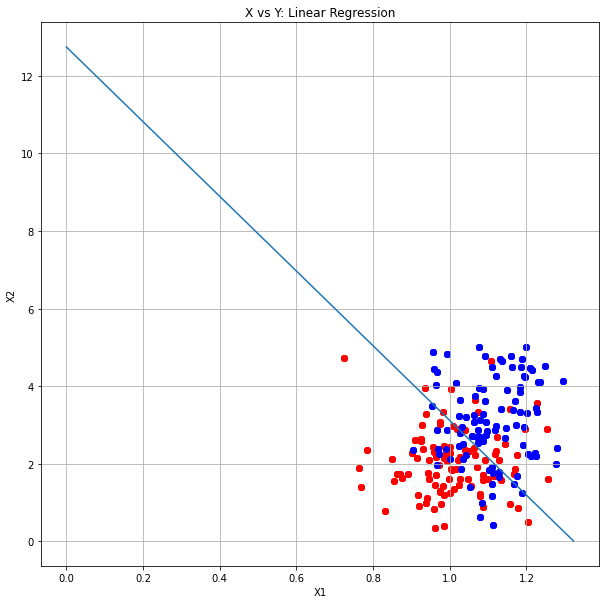

In [12]:
def test_mse():
    X0 = np.hstack((X1, X2)) # A 2D numpy array that represents the sample of feature vectors
    X = np.vstack((X0, np.ones(2*N))) # augment X0
    y = np.hstack((np.ones(N)*(-1), 1*np.ones(N)))
    filename = "plot_mse_output.png"
    plot_mse(X, y, filename)

test_mse()

## 7. [3pts] Redo the function above using Fisher's linear discriminant. Save the function as plot_fisher.

In [13]:
def plot_fisher(X, y, filename):
    w = np.array([0,0,0]) # placeholder

    x_min = 0 # starting x index for graph
    x_max = 10 # maximum x index for graph
    y_min = 0 # starting y index for graph
    y_max = 10 # maximum y index for graph

    colors = {
        1: 'red', 
        2: 'blue'
    }

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num=200, endpoint=True), np.linspace(y_min, y_max, num=200, endpoint=True))

    cmap_light = mpl.colors.ListedColormap(['#AAAFFF','#FFAAAA'])

    # Plot points
    def plot_x_y():
        ax = plt.gca() # get current axes

        for i in range(N):
            ax.scatter(X1[0], X1[1], color=colors[1])
            ax.scatter(X2[0], X2[1], color=colors[2])

        title = "X vs Y: Linear Regression"
        ax.set_title(title) # set the title of the graph
        ax.set_xlabel('X1') # set the x label of the plot
        ax.set_ylabel('X2') # set the y label of the plot
        ax.grid()

    # Convert from decimal to percent
    def to_percent(x, decimals=2):
        return "{0:.2f}%".format(np.round(100*x, decimals=2))

    lda = LinearDiscriminantAnalysis(store_covariance=True)
    lda.fit(np.transpose(X0), y) 
    mc = 1 - lda.score(np.transpose(X0), y)
    lda_Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    lda_Z_r = lda_Z.reshape(xx.shape)

    # Plot x y mesh
    def plot_mesh(xx, yy, Z):
        ax = plt.gca() # get current axes
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
        plot_x_y()

        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])

        ax.set_title(title="X vs Y: LDA")
        ax.comment(comment="Misclassification rate: " + to_percent(mc))


    figure = plt.figure(figsize=(10,10))
    plot_mesh(xx, yy, lda_Z)
    plt.show()
    figure.savefig(filename)

    w = W

    return w


In [14]:
def test_fisher():
    X0 = np.hstack((X1, X2)) # A 2D numpy array that represents the sample of feature vectors
    X = np.vstack((X0, np.ones(2*N))) # augment X0
    y = np.hstack((np.ones(N)*(-1), 1*np.ones(N)))
    filename = "plot_fisher_output.png"
    plot_fisher(X, y, filename)
    
test_fisher()

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Submission: For theory part, submit as a PDF file. For programming part, work on the template hw2.py and submit it.